In [1]:
from cdsgd import DSClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, accuracy_score
import wittgenstein as lw
#pca
from sklearn.decomposition import PCA

In [2]:
Tetra = pd.read_csv('../data/Tetra_Data.csv')
Tetra_labels = pd.read_csv('../data/Tetra_Labels.csv')

Kmeans Silhouette Score: 0.5057941660374363 Number of Clusters: 4
DBSCAN Silhouette Score: 0.30661015070467 Number of Clusters: 4
Agglomerative Silhouette Score: 0.495198706501583 Number of Clusters: 4


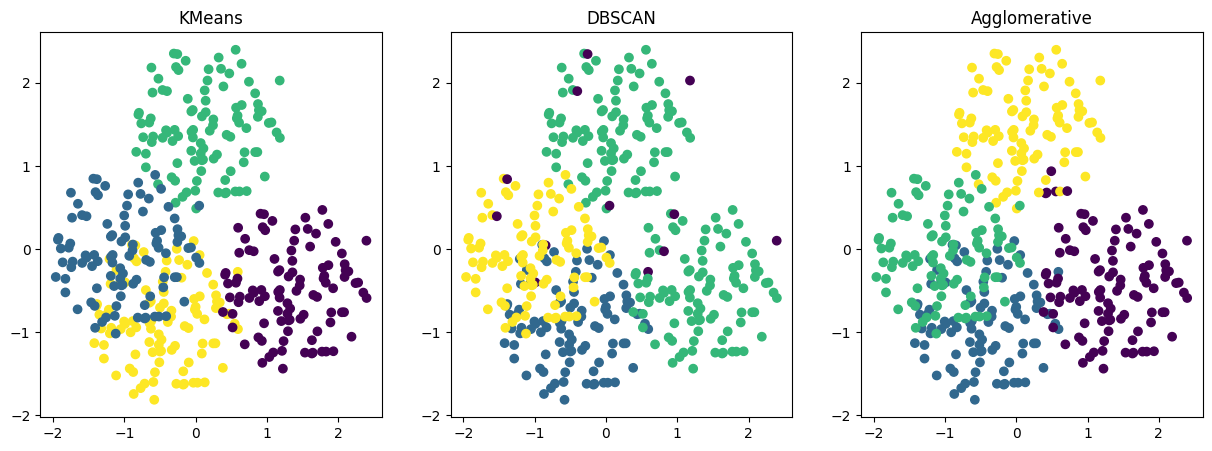

In [3]:
scaler = StandardScaler()
Tetra_scaled = scaler.fit_transform(Tetra)
Tetra = pd.DataFrame(Tetra_scaled, columns=Tetra.columns)
models = []
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(Tetra)
models.append({'model': kmeans, 'name': 'KMeans', 'labels': kmeans_labels})
print('Kmeans Silhouette Score:', silhouette_score(Tetra, kmeans_labels), "Number of Clusters:", len(np.unique(kmeans_labels)))

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(Tetra)
models.append({'model': dbscan, 'name': 'DBSCAN', 'labels': dbscan_labels})
if len(np.unique(dbscan_labels)) > 1:
    print('DBSCAN Silhouette Score:', silhouette_score(Tetra, dbscan_labels), "Number of Clusters:", len(np.unique(dbscan_labels)))
else:
    print('DBSCAN Silhouette Score: N/A', "Number of Clusters:", len(np.unique(dbscan_labels)))

agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(Tetra)
models.append({'model': agg, 'name': 'Agglomerative', 'labels': agg_labels})
print('Agglomerative Silhouette Score:', silhouette_score(Tetra, agg_labels), "Number of Clusters:", len(np.unique(agg_labels)))

# visualize the clusters
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, model in enumerate(models):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(Tetra)
    ax[i].scatter(pca_result[:, 0], pca_result[:, 1], c=model['labels'], cmap='viridis')
    ax[i].set_title(model['name'])
plt.show()

## Lime

In [4]:
clustterToExplain = 1
i = 100 # instance to explain

#KMeans
y = (kmeans_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(Tetra, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(Tetra, y)
print('KMeans Accuracy:', accuracy_score(y, clf.predict(Tetra)))
explainer = LimeTabularExplainer(Tetra.values, mode='classification', feature_names=Tetra.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(Tetra.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

#DBSCAN
if len(np.unique(dbscan_labels)) > 1:
    y = (dbscan_labels == clustterToExplain).astype(int)
    X_train, X_test, y_train, y_test = train_test_split(Tetra, y, test_size=0.2, random_state=42)
    clf = LogisticRegression()
    clf.fit(Tetra, y)
    print('DBSCAN Accuracy:', accuracy_score(y, clf.predict(Tetra)))
    explainer = LimeTabularExplainer(Tetra.values, mode='classification', feature_names=Tetra.columns, class_names=['0', '1'], discretize_continuous=True)
    exp = explainer.explain_instance(Tetra.values[i], clf.predict_proba, num_features=5)
    exp.show_in_notebook(show_table=True, show_all=False)

#Agglomerative
y = (agg_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(Tetra, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(Tetra, y)
print('Agglomerative Accuracy:', accuracy_score(y, clf.predict(Tetra)))
explainer = LimeTabularExplainer(Tetra.values, mode='classification', feature_names=Tetra.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(Tetra.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

KMeans Accuracy: 0.9925


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


DBSCAN Accuracy: 0.955


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Agglomerative Accuracy: 0.99


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Decision tree

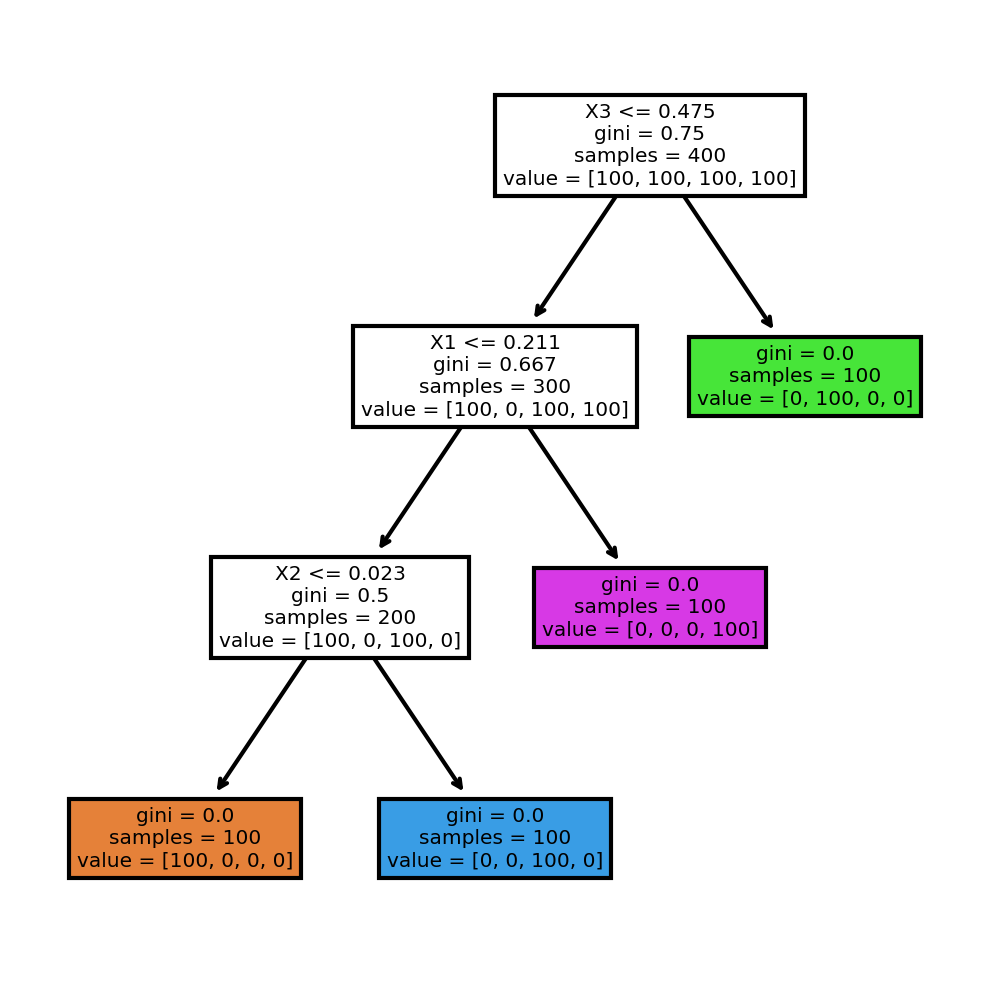

Decision Tree Accuracy: 1.0


In [5]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(Tetra, kmeans_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Tetra.columns)
plt.show()
y_pred = dt.predict(Tetra)
print('Decision Tree Accuracy:', accuracy_score(kmeans_labels, y_pred))


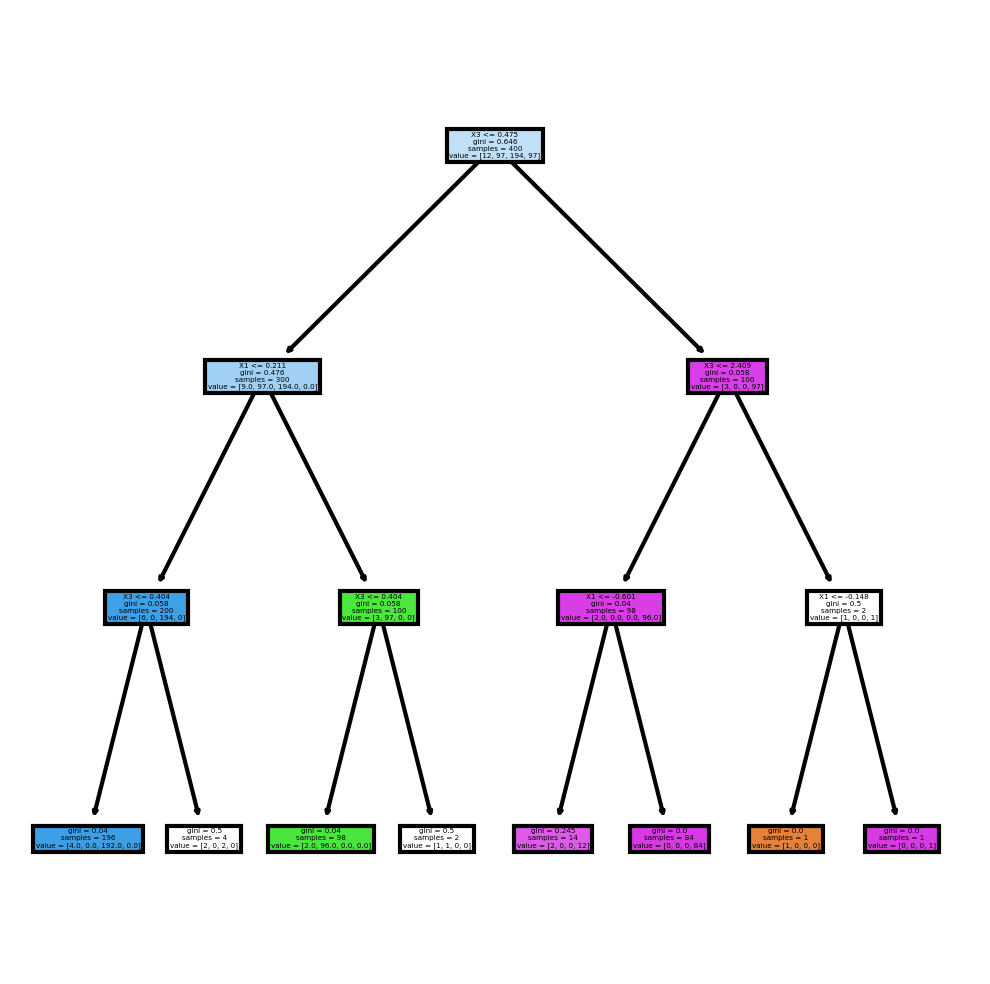

Decision Tree Accuracy: 0.9725


In [6]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(Tetra, dbscan_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Tetra.columns)
plt.show()
y_pred = dt.predict(Tetra)
print('Decision Tree Accuracy:', accuracy_score(dbscan_labels, y_pred))

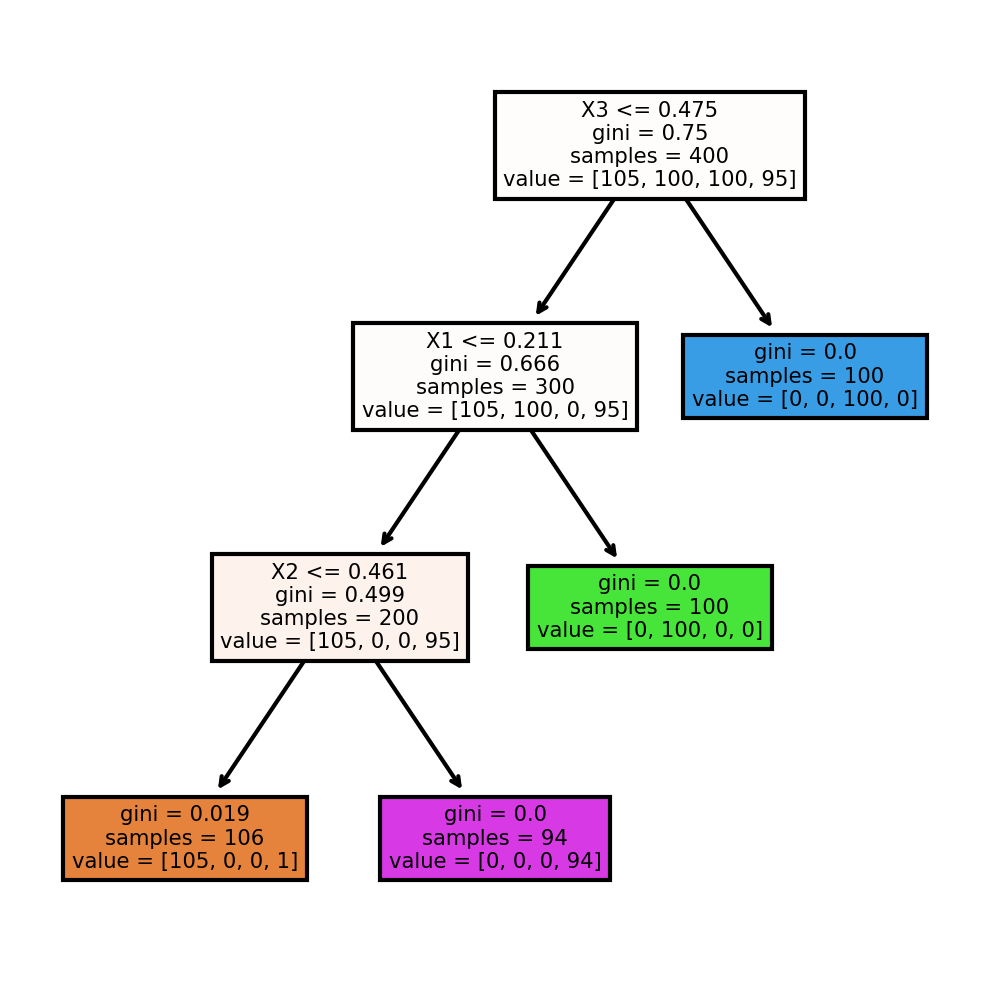

Decision Tree Accuracy: 0.9975


In [7]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(Tetra, agg_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Tetra.columns)
plt.show()
y_pred = dt.predict(Tetra)
print('Decision Tree Accuracy:', accuracy_score(agg_labels, y_pred))

# RIPPER

In [8]:
pos = 1
# cambiamos las etiquetas para que el positivo sea el cluster 0
kmeans_labels_pos = (kmeans_labels == pos).astype(int)
dbscan_labels_pos = (dbscan_labels == pos).astype(int)
agg_labels_pos = (agg_labels == pos).astype(int)
# KMeans
ripper = lw.RIPPER()
df = pd.concat([Tetra, pd.DataFrame(kmeans_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Tetra)
print('RIPPER Accuracy KMeans:', accuracy_score(kmeans_labels_pos, y_pred))
# DBSCAN
ripper = lw.RIPPER()
df = pd.concat([Tetra, pd.DataFrame(dbscan_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Tetra)
print('RIPPER Accuracy DBSCAN:', accuracy_score(dbscan_labels_pos, y_pred))
# Agglomerative
ripper = lw.RIPPER()
df = pd.concat([Tetra, pd.DataFrame(agg_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Tetra)
print('RIPPER Accuracy Agglomerative:', accuracy_score(agg_labels_pos, y_pred))

[[X3=>1.65] V [X3=0.96-1.65] V [X3=0.25-0.96^X1=0.41-0.94] V [X3=0.25-0.96^X1=-0.17-0.051] V [X3=0.25-0.96^X1=0.051-0.41] V [X3=0.25-0.96^X1=-0.45--0.17^X2=0.032-0.28] V [X2=-0.29-0.032^X1=-0.45--0.17]]
RIPPER Accuracy KMeans: 0.9875
[[X2=>1.37] V [X2=<-1.33] V [X2=-1.33--0.88] V [X2=0.89-1.37] V [X2=0.51-0.89^X1=-0.45--0.17] V [X2=0.51-0.89^X1=<-1.19] V [X2=0.51-0.89^X1=-1.19--0.86] V [X1=-0.86--0.59^X3=-0.57--0.43] V [X1=-0.59--0.45^X2=-0.88--0.54] V [X3=-0.3--0.0073^X1=-0.17-0.051] V [X1=<-1.19] V [X1=-1.19--0.86^X3=-0.43--0.3] V [X1=-0.59--0.45^X2=0.51-0.89] V [X1=-1.19--0.86^X3=-1.12--0.84]]
RIPPER Accuracy DBSCAN: 0.9125
[[X1=>1.61] V [X1=0.94-1.61] V [X1=0.41-0.94^X3=-0.84--0.57] V [X1=0.41-0.94^X3=-0.43--0.3] V [X1=0.41-0.94^X3=-1.12--0.84] V [X1=0.41-0.94^X3=-0.3--0.0073] V [X1=0.41-0.94^X3=-0.0073-0.25] V [X1=0.41-0.94^X3=<-1.12] V [X1=0.051-0.41^X3=-0.57--0.43^X2=0.032-0.28]]
RIPPER Accuracy Agglomerative: 0.9925


## DSClustering

Optimization started
Processing epoch	373	0.0001	

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Training time: 20.74s, epochs: 400

Least training loss reached: 0.000


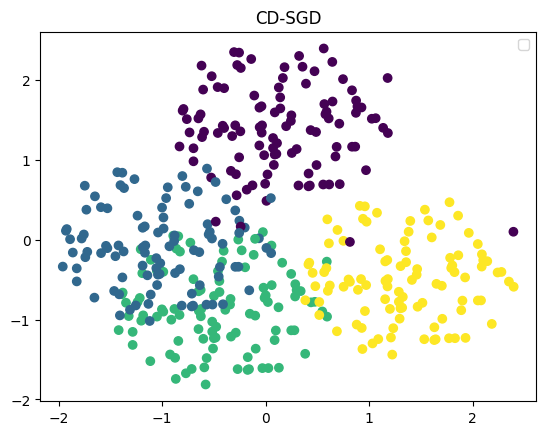

In [9]:
cdsgd = DSClustering(data=Tetra)
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
models.append({'model': cdsgd, 'name': 'CD-SGD', 'labels': cdsgd_labels})
#vvisualize the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Tetra)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cdsgd_labels, cmap='viridis')
plt.title('CD-SGD')
plt.legend()
plt.show()

In [10]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.638] R22: -0.013 < X3 < 0.660
			0: 0.407	1: 0.000	2: 0.255	3: 0.338	Unc: 0.000

	[0.618] R12: X1 < -0.619
			0: 0.465	1: 0.012	2: 0.000	3: 0.344	Unc: 0.179

	[0.610] R13: -0.619 < X1 < 0.069
			0: 0.428	1: 0.072	2: 0.000	3: 0.371	Unc: 0.129

	[0.513] R21: -0.686 < X3 < -0.013
			0: 0.265	1: 0.000	2: 0.384	3: 0.343	Unc: 0.008

	[0.502] R20: X3 < -0.686
			0: 0.253	1: 0.000	2: 0.381	3: 0.366	Unc: 0.000

	[0.491] R37: Negative X1 - 0.069, X2 - -0.081
			0: 0.318	1: 0.271	2: 0.168	3: 0.000	Unc: 0.243

	[0.443] R19: X2 > 0.606
			0: 0.388	1: 0.118	2: 0.000	3: 0.000	Unc: 0.494

	[0.254] R47: Negative X2 - -0.081, X3 - -0.013
			0: 0.193	1: 0.142	2: 0.000	3: 0.000	Unc: 0.666

Most important rules for Cluster 1

	[0.510] R17: -0.768 < X2 < -0.081
			0: 0.000	1: 0.260	2: 0.492	3: 0.248	Unc: 0.000

	[0.501] R18: -0.081 < X2 < 0.606
			0: 0.053	1: 0.402	2: 0.171	3: 0.000	Unc: 0.375

	[0.496] R46: Positive X2 - -0.081, X3 - -0.013
			0: 0.000	1: 0.365	2: 

c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\cdsgd\ClusteringSelector.py:248: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  row_modes[0][x] = self.get_best_labels()[x]


Optimization started
Processing epoch	373	0.0001	

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Training time: 21.03s, epochs: 400

Least training loss reached: 0.000


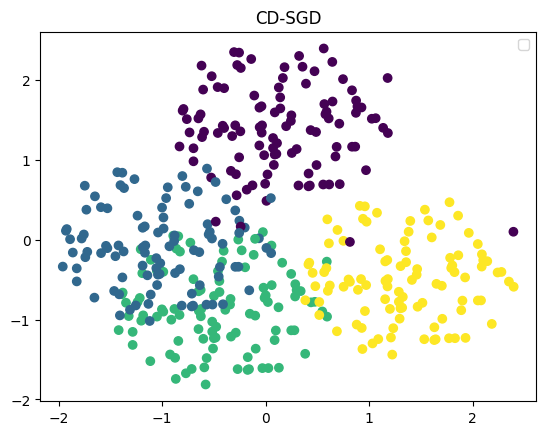

In [11]:
cdsgd = DSClustering(data=Tetra, most_voted=True)
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
models.append({'model': cdsgd, 'name': 'CD-SGD más votado', 'labels': cdsgd_labels})
#vvisualize the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Tetra)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cdsgd_labels, cmap='viridis')
plt.title('CD-SGD')
plt.legend()
plt.show()

In [12]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.627] R12: X1 < -0.619
			0: 0.469	1: 0.002	2: 0.000	3: 0.365	Unc: 0.164

	[0.611] R13: -0.619 < X1 < 0.069
			0: 0.449	1: 0.012	2: 0.000	3: 0.369	Unc: 0.170

	[0.598] R22: -0.013 < X3 < 0.660
			0: 0.358	1: 0.000	2: 0.245	3: 0.397	Unc: 0.000

	[0.484] R21: -0.686 < X3 < -0.013
			0: 0.237	1: 0.000	2: 0.390	3: 0.363	Unc: 0.010

	[0.450] R37: Negative X1 - 0.069, X2 - -0.081
			0: 0.273	1: 0.310	2: 0.158	3: 0.000	Unc: 0.258

	[0.445] R20: X3 < -0.686
			0: 0.200	1: 0.000	2: 0.358	3: 0.430	Unc: 0.011

	[0.416] R19: X2 > 0.606
			0: 0.363	1: 0.111	2: 0.000	3: 0.000	Unc: 0.525

	[0.264] R47: Negative X2 - -0.081, X3 - -0.013
			0: 0.191	1: 0.173	2: 0.000	3: 0.000	Unc: 0.636

Most important rules for Cluster 1

	[0.514] R46: Positive X2 - -0.081, X3 - -0.013
			0: 0.000	1: 0.380	2: 0.233	3: 0.082	Unc: 0.305

	[0.497] R17: -0.768 < X2 < -0.081
			0: 0.000	1: 0.247	2: 0.485	3: 0.268	Unc: 0.000

	[0.480] R37: Negative X1 - 0.069, X2 - -0.081
			0: 0.273

Optimization started
Processing epoch	373	0.0001	

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Training time: 20.77s, epochs: 400

Least training loss reached: 0.000


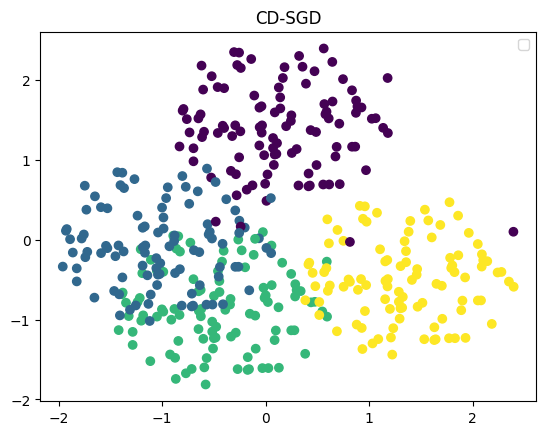

In [13]:
cdsgd = DSClustering(data=Tetra,cluster=4)
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
models.append({'model': cdsgd, 'name': 'CD-SGD con 2 clusters', 'labels': cdsgd_labels})
#vvisualize the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Tetra)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cdsgd_labels, cmap='viridis')
plt.title('CD-SGD')
plt.legend()
plt.show()

In [14]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.634] R22: -0.013 < X3 < 0.660
			0: 0.402	1: 0.000	2: 0.246	3: 0.352	Unc: 0.000

	[0.591] R12: X1 < -0.619
			0: 0.433	1: 0.001	2: 0.000	3: 0.373	Unc: 0.193

	[0.571] R13: -0.619 < X1 < 0.069
			0: 0.361	1: 0.081	2: 0.000	3: 0.461	Unc: 0.097

	[0.496] R21: -0.686 < X3 < -0.013
			0: 0.250	1: 0.000	2: 0.333	3: 0.403	Unc: 0.015

	[0.493] R19: X2 > 0.606
			0: 0.404	1: 0.198	2: 0.000	3: 0.000	Unc: 0.398

	[0.488] R20: X3 < -0.686
			0: 0.241	1: 0.000	2: 0.334	3: 0.413	Unc: 0.012

	[0.383] R37: Negative X1 - 0.069, X2 - -0.081
			0: 0.240	1: 0.233	2: 0.141	3: 0.000	Unc: 0.387

	[0.249] R47: Negative X2 - -0.081, X3 - -0.013
			0: 0.210	1: 0.085	2: 0.000	3: 0.000	Unc: 0.705

Most important rules for Cluster 1

	[0.536] R18: -0.081 < X2 < 0.606
			0: 0.048	1: 0.434	2: 0.180	3: 0.000	Unc: 0.338

	[0.481] R17: -0.768 < X2 < -0.081
			0: 0.000	1: 0.231	2: 0.519	3: 0.250	Unc: 0.000

	[0.390] R39: Negative X1 - 0.069, X3 - -0.013
			0: 0.004	1: 0.302	2: 0

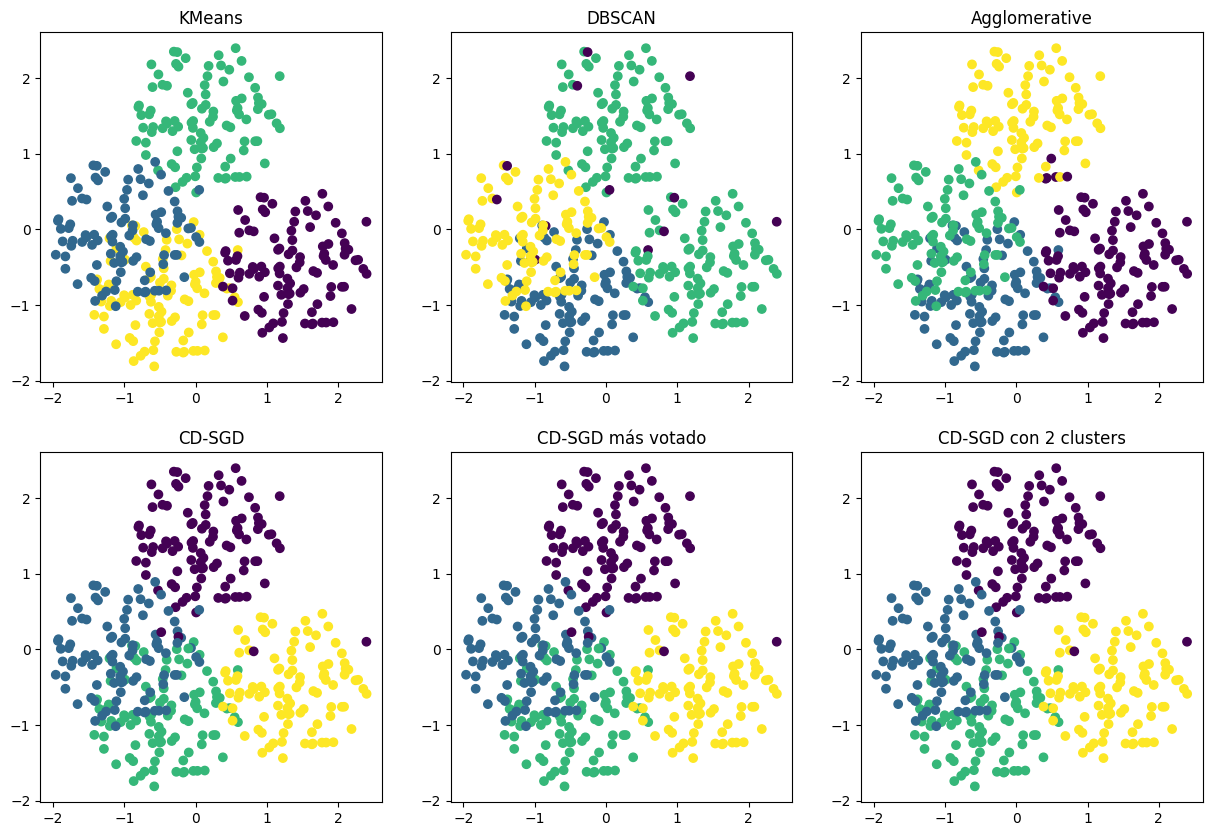

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, model in enumerate(models):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(Tetra)
    ax[i//3, i%3].scatter(pca_result[:, 0], pca_result[:, 1], c=model['labels'], cmap='viridis')
    ax[i//3, i%3].title.set_text(model['name'])
plt.show()